In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from heat import heat_nn

np.random.seed(238)
torch.manual_seed(301)

/tmp/ipykernel_3545/960963904.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  pde_nn.set_analytic_solution(lambda x, t: np.sin(np.pi * x) * np.exp(-np.pi**2 * t))


Epoch 0, Loss: 12.053982, MSE: 0.093578
Epoch 50, Loss: 3.882263, MSE: 0.015704
Epoch 100, Loss: 2.768622, MSE: 0.013932
Epoch 150, Loss: 1.665272, MSE: 0.007847
Epoch 200, Loss: 0.476541, MSE: 0.001250
Epoch 250, Loss: 0.250001, MSE: 0.000453
Epoch 300, Loss: 0.180549, MSE: 0.000281
Epoch 350, Loss: 0.146651, MSE: 0.000202
Epoch 400, Loss: 0.150171, MSE: 0.000351
Epoch 450, Loss: 0.111626, MSE: 0.000135
Epoch 499, Loss: 0.112043, MSE: 0.000217
0.00021670407


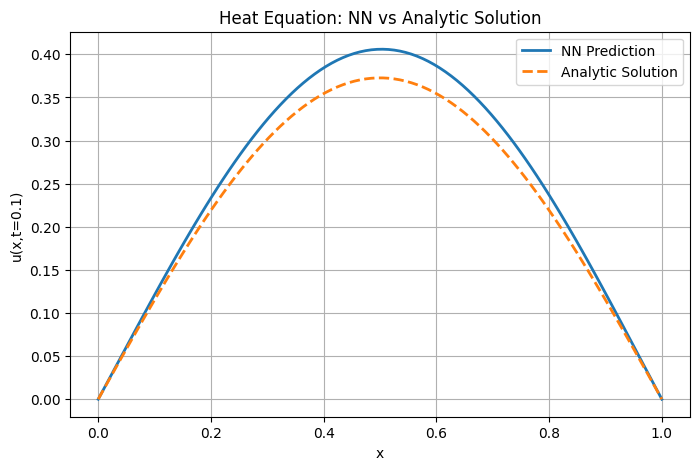

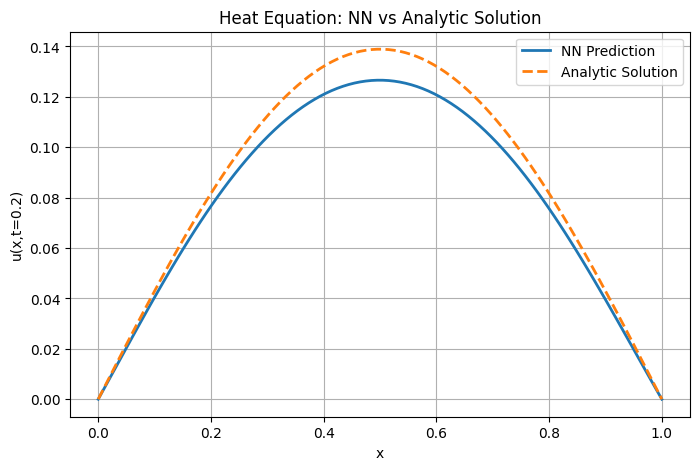

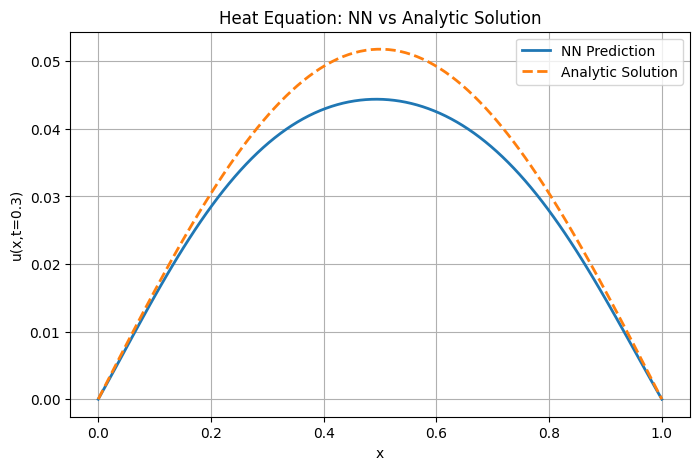

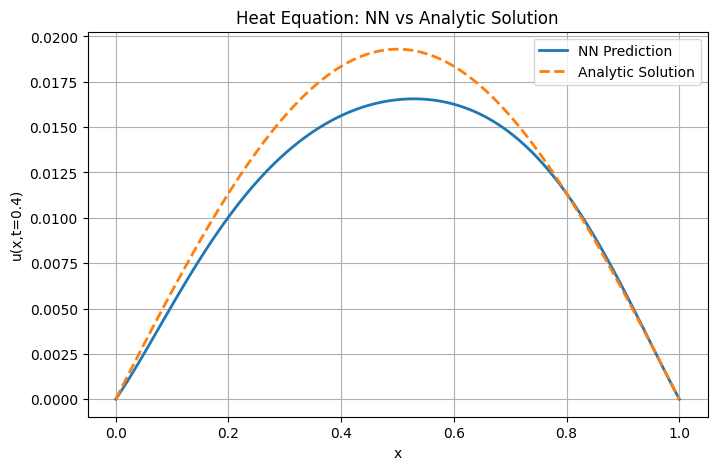

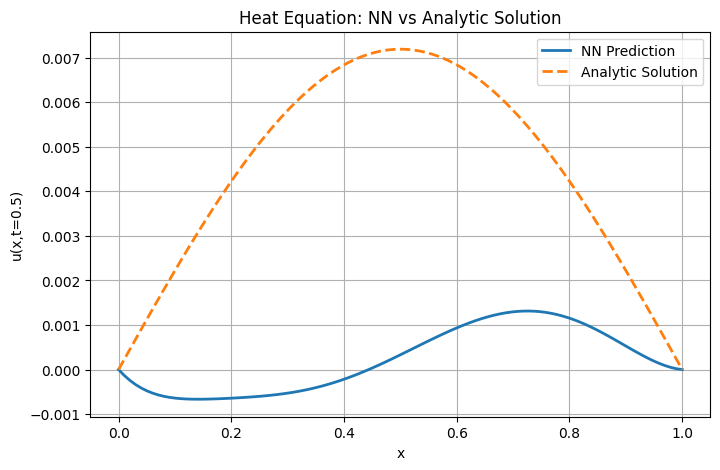

In [ ]:
layers = [50, 100, 200, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
pde_nn = heat_nn(layers, activations, 1, lambda x: torch.sin(torch.pi * x))

N_colloc = 100

pde_nn.set_data(N_colloc)
pde_nn.set_analytic_solution(lambda x, t: np.sin(np.pi * x) * np.exp(-np.pi**2 * t))
pde_nn.train(lr=1e-3, weight_decay=0.0, epochs = 500, print_epochs=50)
print(pde_nn.mse())
#proper result for epochs =5000

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    x_test = torch.linspace(0,1,100).view(-1,1)
    t_test = torch.tensor([[t]]*100)  # t=0.5
    u_pred = pde_nn.trial_solution(x_test, t_test).detach().numpy()

    #compare results with analytic solution

    x_np = x_test.numpy().flatten()  # convert to 1D array for plotting
    t_val = t
    u_analytic = np.sin(np.pi * x_np) * np.exp(-np.pi**2 * t_val)

    # Plot the results
    plt.figure(figsize=(8,5))
    plt.plot(x_np, u_pred, label='NN Prediction', linewidth=2)
    plt.plot(x_np, u_analytic, '--', label='Analytic Solution', linewidth=2)
    plt.xlabel('x')
    plt.ylabel(f'u(x,t={t})')
    plt.title('Heat Equation: NN vs Analytic Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
"""
2D Heat equation
"""

layers = [200, 100, 50, 1]
#in this example: the output layer uses identity as activation func and all the hidden layers use tanh
activations = [torch.tanh]*(len(layers)-1) + [None]
pde_nn = heat_nn(layers, activations, 2, lambda x, y: (torch.sin(torch.pi * x) * torch.sin(torch.pi * y)))

N_colloc = 10

pde_nn.set_data(N_colloc, N_colloc, N_colloc)

pde_nn.train(lr=1e-3, weight_decay=0, epochs = 50, print_epochs=50)
#proper result for epochs =5000

for t in [0.1, 0.2, 0.3, 0.4, 0.5]:
    x_test = torch.linspace(0,1,100).view(-1,1)
    y_test = torch.linspace(0,1,100).view(-1,1)
    t_test = torch.tensor([[t]]*100)  # t=0.5
    u_pred = pde_nn.trial_solution(x_test, y_test, t_test).detach().numpy()

Epoch 0, Loss: 23.853832
Epoch 49, Loss: 20.259142
